In [1]:
library(dplyr)


Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




# Datasets


In [3]:
sae=read.csv2("sae.csv")

print(sae)



  dep nb_psychiatres nb_places nb_non_psychiatres nb_non_medical
1  59            385      3000                 66           4767
2  60             86      1242                 21           1571
3  62            158      1788                 45           2163
4  80             62       598                  5            846
  nb_etp_inf_et_autres
1              3942.54
2              1302.26
3              1644.82
4               687.39


In [3]:

finess=read.csv2("C:/Users/33770/F2RSM/tuto/finess_geoloc.csv")
finess=finess%>%select("nofinessej","rs","coordxet","coordyet")

print(head(finess))


  nofinessej                          rs coordxet coordyet
1  010780054              CH DE FLEYRIAT 870215.7  6571591
2  010780062                CH BUGEY SUD 908351.7  6520414
3  010780096 CH DE TREVOUX - MONTPENSIER 837272.3  6539470
4  010780112           CH DU PAYS DE GEX 935201.9  6584824
5  010780120             CH DE MEXIMIEUX 870112.6  6536421
6  010780138          CH DE PONT DE VAUX 849471.2  6594365


In [7]:

cities=read.csv2("coordonnees_geo.csv")
print(cities)

                CH      lat     long
1           Amiens 49.89407 2.295753
2 Boulogne sur Mer 50.72523 1.613334
3            Creil 49.25769 2.478391
4            Lille 50.62925 3.057256
5     Valenciennes 50.35711 3.518332


# Import map

The function **readOGR** from the library **rgdal** is used for loading maps.

It require the path of the map and the name of the file as **layer**.


In [8]:
library(rgdal)

hdf=readOGR("/cartes/hdf",layer="hdf")

Warning message:
"le package 'rgdal' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : sp

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-29, (SVN revision 1165M)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: C:/Users/33770/Documents/R/win-library/4.1/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: C:/Users/33770/Documents/R/win-library/4.1/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-6
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.
Overwritten PROJ_LIB was C:/Users/33770/Documents/R/win-library/4.1/rgdal/proj



ERROR: Error in ogrInfo(dsn = dsn, layer = layer, encoding = encoding, use_iconv = use_iconv, : Cannot open data source


# Print the map 

We use the library **tmap** to build the maps.

- **tm_shape** : select the base map
- **tm_borders** : set up the borders on the map 
    - _col_ : set a color
    - _lwd_ : set the thickness
    - _etc_
    
If you don't set a parameter, a default value will be chosen

In [9]:
library(tmap)

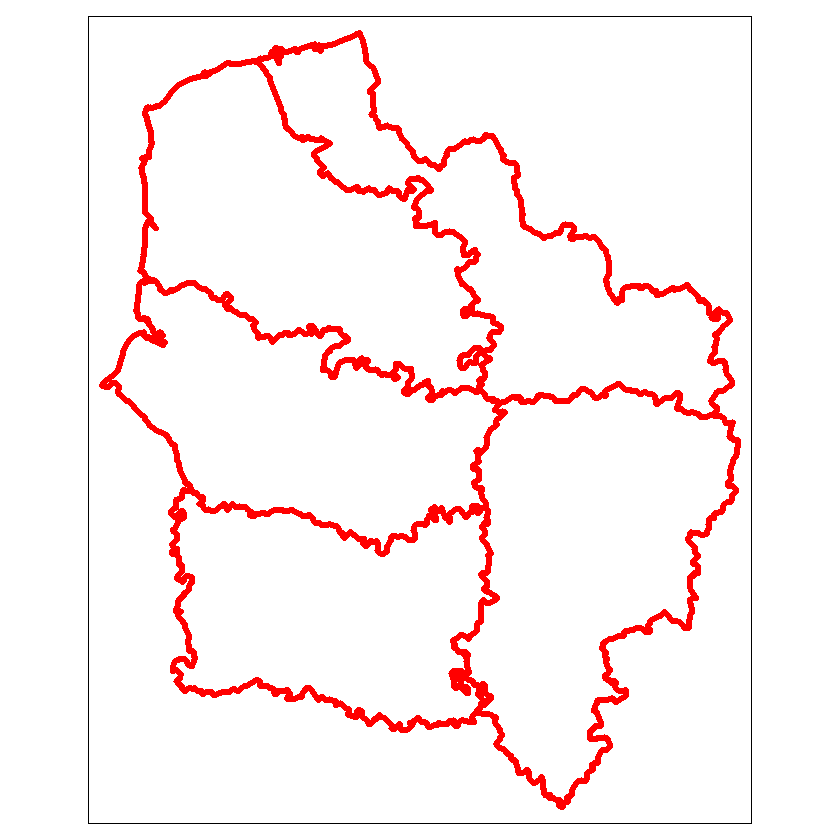

In [11]:
tm_shape(hdf) + tm_borders(col='red', lwd= 5)

**Q1 - Update the code above to print the map with _thicker_ and  _red_ borders**

# Place some localisations

With the geographical coordinates of a localisation we can place it on the map.


The coordinates must be convert into a spatial object using their Coordinate Reference Systems (CRS)

The library **sf** is used for that :

- **st_as_sf** : convert the geographical coordinates into a spatial object wich can be used for a map 
    - _coords_ : name of the columns containing the coordinates 
    - _crs_ : CRS of the coordinates
  


The spatial object made from the localisations and the base map must have the same CRS.

The CRS used for finess data is **Lambert 93**, the code for this CRS is **2154**.

The CRS used for hdf map is **WGS 84**, the code for it is **4326**

So a reprojection is needed to convert Lambert 93 to WGS 84 (if the crs are the same this stage is useless)


- **st_transform** : reproject spatial data
- **st_crs(** . **)$proj4string** : get the crs

In [123]:
library(sf)

finess_points=finess %>% st_as_sf(coords=c('coordxet','coordyet'),crs=2154) 

finess_points=st_transform(finess_points,4326)

proj_hdf=st_crs(hdf)$proj4string
proj_finess=st_crs(finess_points)$proj4string

print(proj_hdf)
print(proj_finess)

[1] "+proj=longlat +datum=WGS84 +no_defs"
[1] "+proj=longlat +datum=WGS84 +no_defs"


**Q2 - Make a spatial object *cities_points* from *cities* dataset** _(crs = 4326)_


In [121]:
# Code here

We can add the new shape (**finess_points**) for the establishment above the previous map.

- **tm_dots** : set up the dots :
    - _size_ : set up the size
    - _col_ : set up the color
    - _etc_
    



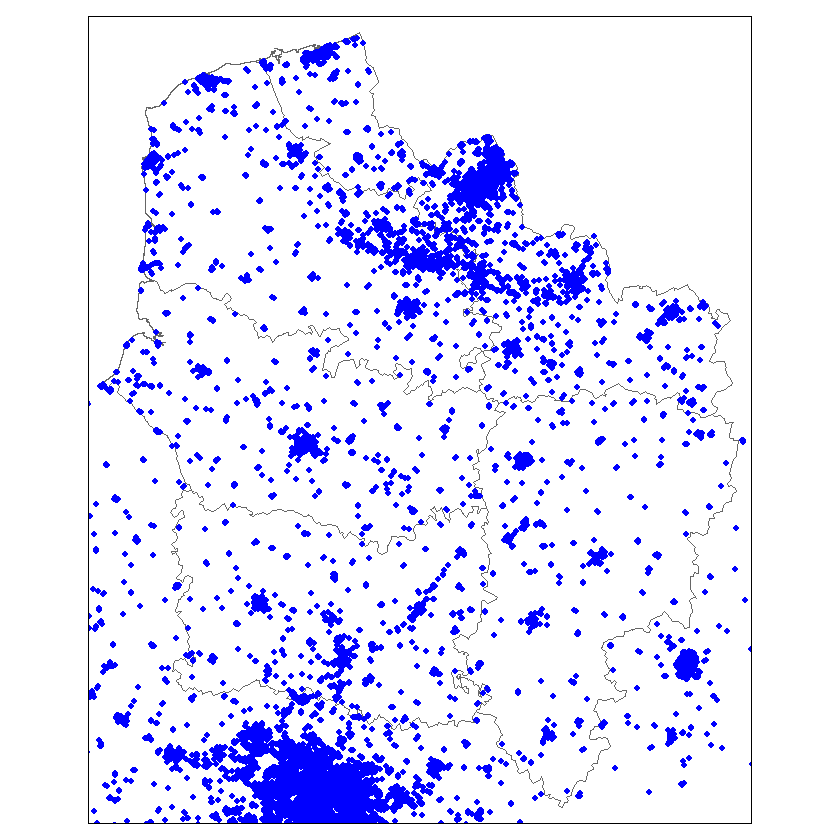

In [117]:
tm_shape(hdf) + tm_borders() + tm_shape(finess_points) +tm_dots(size=0.1,col='blue') 


**Q3 - Place the cities from _cities_ dataset on the _hdf_ base map**

In [124]:
# Code here

# Map data

Every map had data : _mapname_**@data** allow to get them

In [149]:
hdf1=hdf  #copy of hdf for modification

map_data=hdf1@data

print(map_data)

  GID_0 NAME_0   GID_1          NAME_1 NL_NAME_1     GID_2        NAME_2
0   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.1_1         Aisne
1   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.2_1          Nord
2   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.3_1          Oise
3   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.4_1 Pas-de-Calais
4   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.5_1         Somme
  VARNAME_2 NL_NAME_2       TYPE_2  ENGTYPE_2 CC_2 HASC_2
0      <NA>      <NA> DÃ©partement Department   02  FR.AS
1      <NA>      <NA> DÃ©partement Department   59  FR.NO
2      <NA>      <NA> DÃ©partement Department   60  FR.OI
3      <NA>      <NA> DÃ©partement Department   62  FR.PC
4      <NA>      <NA> DÃ©partement Department   80  FR.SO


## Adding data

We can add our own features to it using **merge** :
- **y** : dataset 
- **by.x** : columns name in map data 
- **by.y** : columns name in the dataset
- **all.x** : always set all.x at TRUE to avoid losing map data

After doing the merge we can replace the map data (hdf1@data) by the new dataset created.

In [150]:
map_data=map_data%>%merge(y=sae, by.x ="CC_2",by.y="dep",all.x=TRUE)

print(colnames(map_data))


hdf1@data=map_data

paste('*** NEW MAP DATA ***')
print(hdf1@data)

 [1] "CC_2"                 "GID_0"                "NAME_0"              
 [4] "GID_1"                "NAME_1"               "NL_NAME_1"           
 [7] "GID_2"                "NAME_2"               "VARNAME_2"           
[10] "NL_NAME_2"            "TYPE_2"               "ENGTYPE_2"           
[13] "HASC_2"               "nb_psychiatres"       "nb_places"           
[16] "nb_non_psychiatres"   "nb_non_medical"       "nb_etp_inf_et_autres"


[1] "*** NEW MAP DATA ***"

  CC_2 GID_0 NAME_0   GID_1          NAME_1 NL_NAME_1     GID_2        NAME_2
1   02   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.1_1         Aisne
2   59   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.2_1          Nord
3   60   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.3_1          Oise
4   62   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.4_1 Pas-de-Calais
5   80   FRA France FRA.7_1 Hauts-de-France      <NA> FRA.7.5_1         Somme
  VARNAME_2 NL_NAME_2       TYPE_2  ENGTYPE_2 HASC_2 nb_psychiatres nb_places
1      <NA>      <NA> DÃ©partement Department  FR.AS             NA        NA
2      <NA>      <NA> DÃ©partement Department  FR.NO            385      3000
3      <NA>      <NA> DÃ©partement Department  FR.OI             86      1242
4      <NA>      <NA> DÃ©partement Department  FR.PC            158      1788
5      <NA>      <NA> DÃ©partement Department  FR.SO             62       598
  nb_non_psychiatres nb_non_medical nb_etp_inf_et_autres
1      

## Coloured map

We can now use these data to colour the map depending on one of the variables.

- **tm_polygons** : set up the polygons (wich define geographical areas)
    - _col_ : set up the color to fill the polygons, can be a single color or a variable from the data

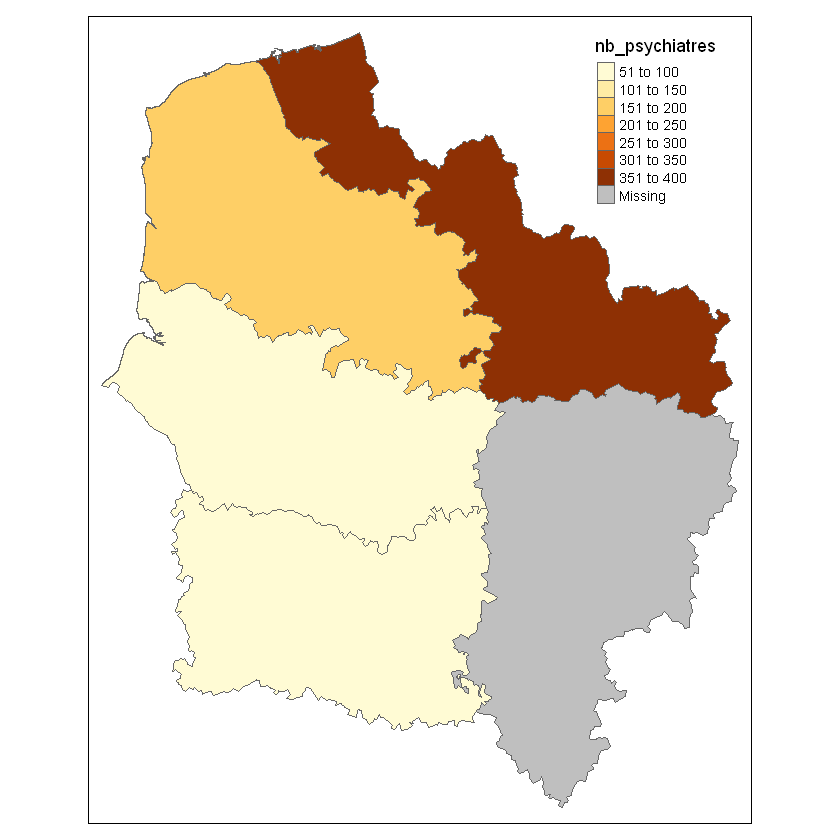

In [154]:
tm_shape(hdf1) + tm_polygons(col="nb_psychiatres")

**Q4 - Make a map with areas coloured depending on the _nb_places_ variables**

In [ ]:
# Code here

A lot of customisation is allowed in the **tm_polygons** function : 
- _palette_ : set the palette color (see RColorBrewer to find appropriate palette)
- _title_ : set the title of the legend
- _breaks_ : set the class of the legend
- _etc_

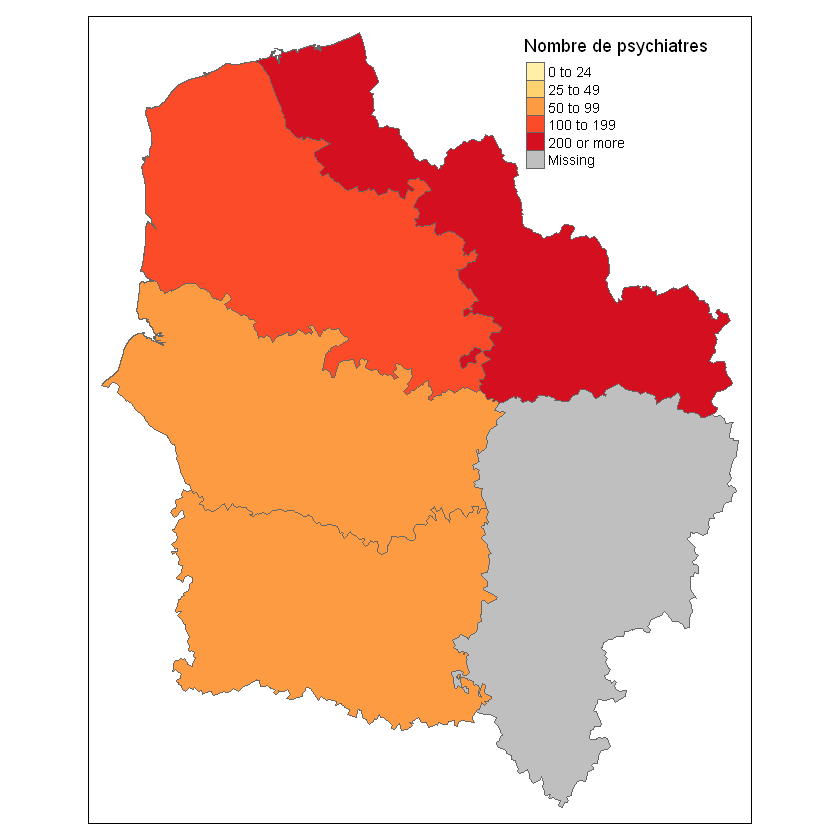

In [196]:
tm_shape(hdf1) + tm_polygons(col="nb_psychiatres",
                             palette="YlOrRd",
                             title="Nombre de psychiatres",
                             breaks=c(0,25,50,100,200,+Inf))

**Q5 - Update your last code to customise the map**

We can also add the shape for the dots to a coloured map  

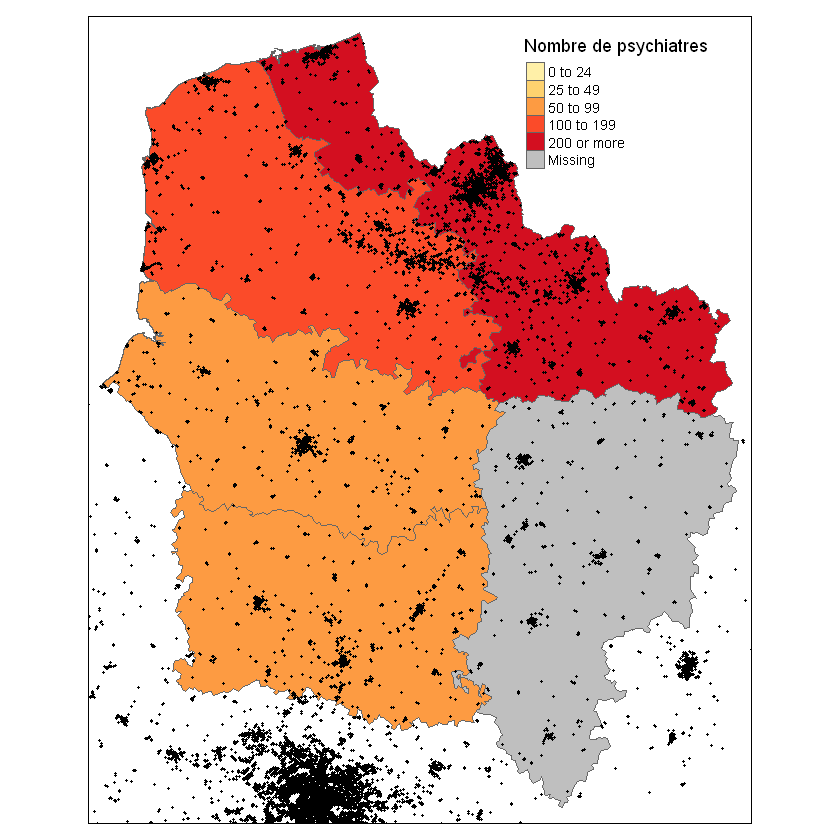

In [197]:
tm_shape(hdf1) + tm_polygons(col="nb_psychiatres", palette="YlOrRd",
                             title="Nombre de psychiatres",
                             breaks=c(0,25,50,100,200,+Inf)) +
tm_shape(finess_points)+tm_dots()

**Q6 - Add the dots from finess data to your last map**

In [198]:
#Code here

# Facets 

## By one column

**tm_facets** function is used to separate the data in subset according to the modality of a variable and make one map per subset.



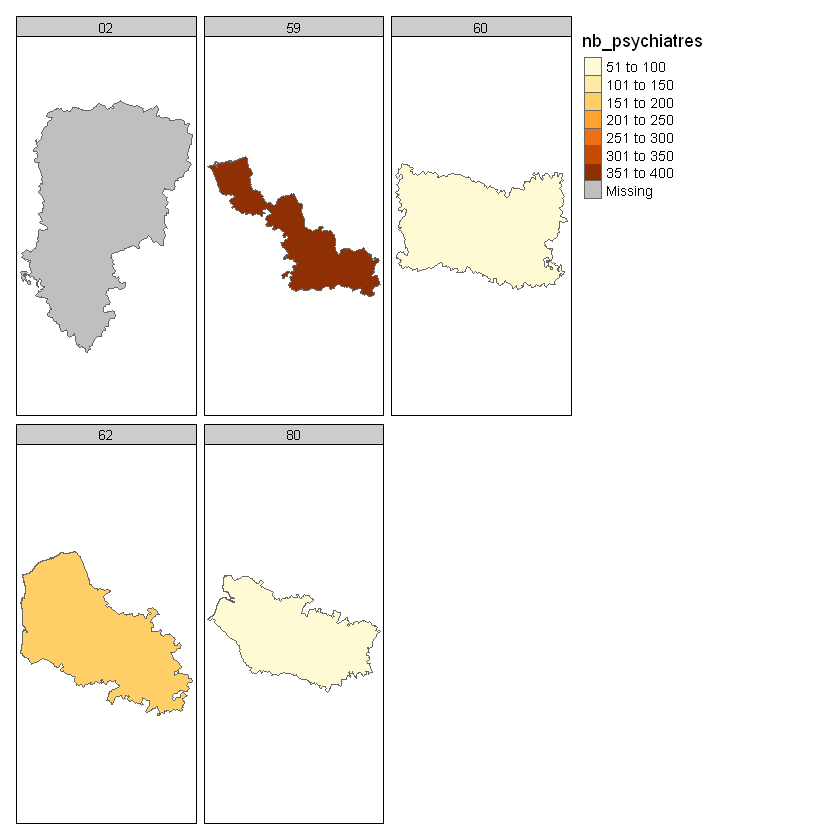

In [199]:
tm_shape(hdf1) + tm_polygons(col="nb_psychiatres")+
tm_facets("CC_2")

**Q7 - Update the code above to make facet according to the following column : _NAME_2_**

## By multiple columns

We can also make facets using the data of column per map by giving a list of variables to the **col** parameter of **tm_polygons** function. 

_this can also be done with other functions and parameters_

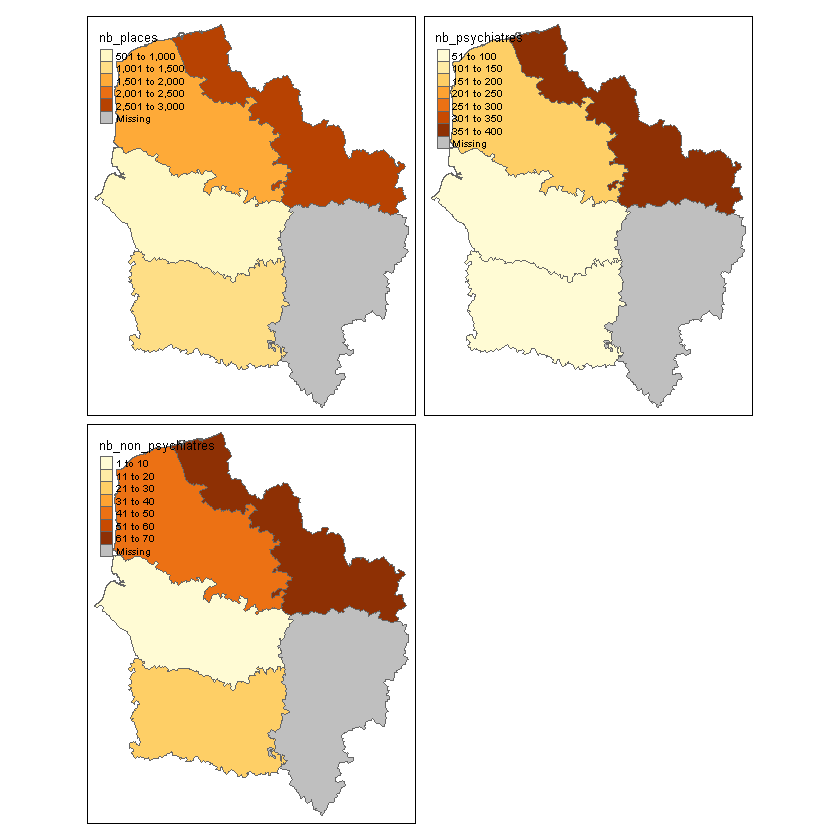

In [200]:
tm_shape(hdf1) + tm_polygons(c("nb_places","nb_psychiatres","nb_non_psychiatres"))

**Q8 - Update the code above to add facets for the following variables: _nb_non_medical_ and  _nb_etp_inf_et_autres_**

Facets map can be customized to :

- **tm_facets** :

    - _nrow_ / _ncol_ : set the number of rows/columns
    
- **tm_layout** :
    - _panel.labels_ : set the names of the labels in the headers


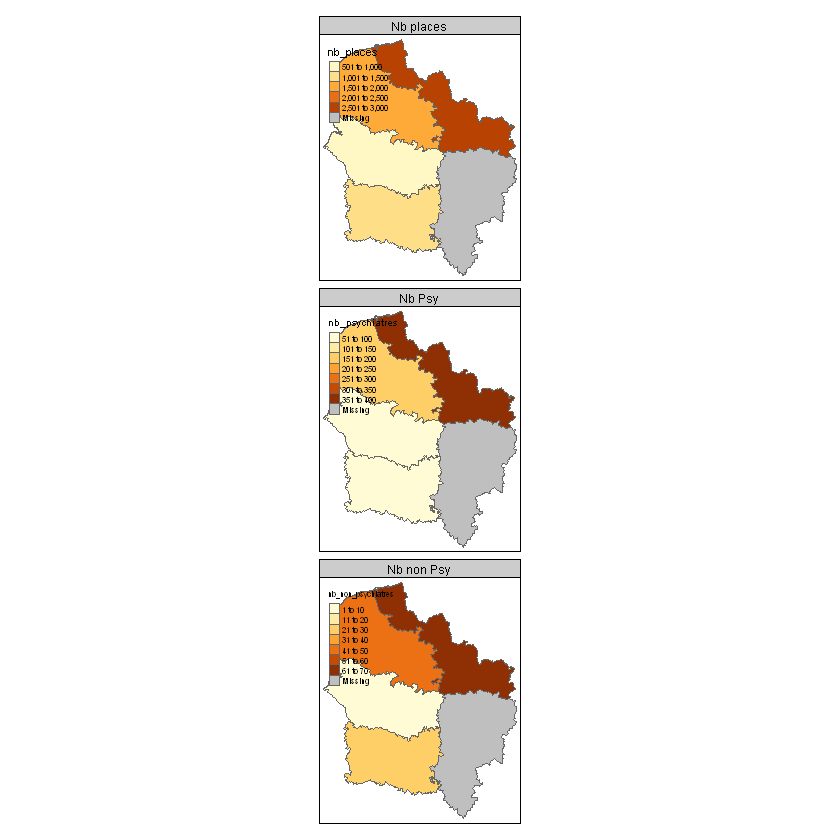

In [201]:
tm_shape(hdf1) + tm_polygons(c("nb_places","nb_psychiatres","nb_non_psychiatres")) + 
tm_facets(nrow=3,ncol=1) +
tm_layout(panel.labels=c("Nb places","Nb Psy","Nb non Psy"))

**Q9 - Add to you last map the names of the variables in headers, make 2 rows and 3 columns**

In [202]:
# Code here 

# More customisation features

The function **tm_layout** allow to customise the look of the maps, here some interisting parameters :

- _title_ : set a title
- _legend.position_ : set the position of the legend
- _bg.color_ : set the colour of the background
- _etc_

All the parameters are available at : https://www.rdocumentation.org/packages/tmap/versions/3.3-3/topics/tm_layout

_**tm_layout** is totally optional for making maps_


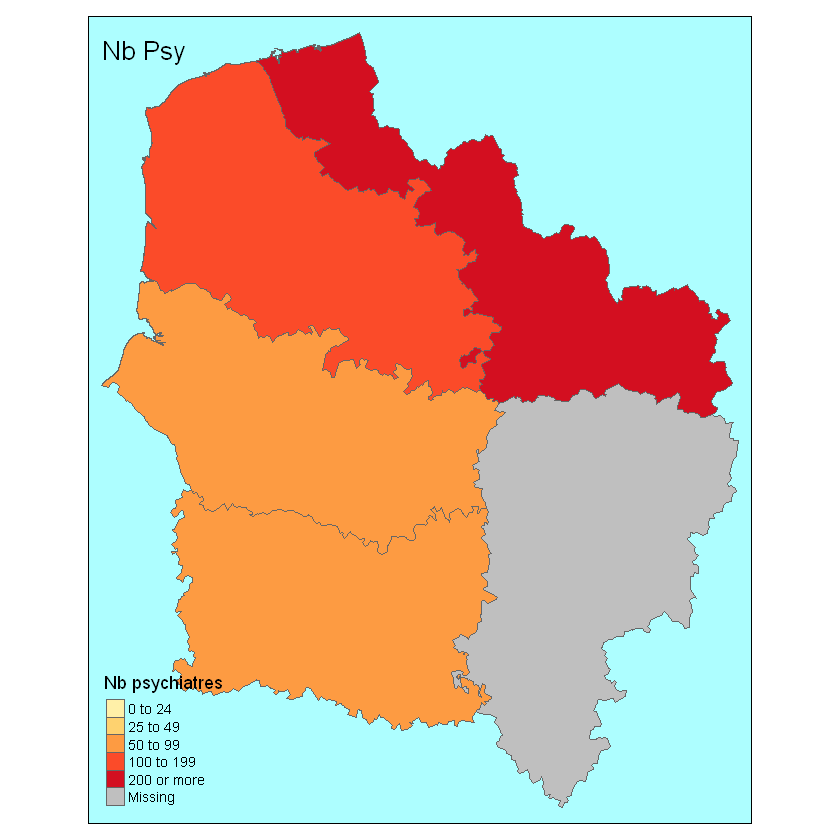

In [204]:
tm_shape(hdf1) + tm_polygons(col="nb_psychiatres",
                             palette="YlOrRd",
                             title="Nb psychiatres",
                             breaks=c(0,25,50,100,200,+Inf)) +
tm_layout(bg.color='#adfeff',legend.position=c("left","bottom"),title="Nb Psy")


**Q10 - Try to customise some of the previous maps**